Eleonora Pura - 17-732-678

In [1]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy.stats as sp
import networkx.algorithms.community as nxacom

<h1>A04.1 Community detection</h1>

In [2]:
filenames = glob.glob('Data/*.gml')

In [3]:
filenames

['Data\\graph_AstroPh.gml',
 'Data\\graph_celegansInteractomes.gml',
 'Data\\graph_chess.gml',
 'Data\\graph_CondMat.gml',
 'Data\\graph_dolphins.gml',
 'Data\\graph_eu_airlines.gml',
 'Data\\graph_facebook.gml',
 'Data\\graph_florentine_families.gml',
 'Data\\graph_game_thrones.gml',
 'Data\\graph_internet.gml',
 'Data\\graph_jazz_collab.gml',
 'Data\\graph_karate.gml',
 'Data\\graph_terrorists.gml']

<p>a), b) Find the communities using the greedy modularity maximization by Clauset Newman and Moore and the label propagation algorithm.</p>
<p>Assign to each community a color and draw the resulting graph.</p>

In [4]:
def assign_community_color(graph, community):
    colormap = plt.cm.Paired
    colors = [colormap(i) for i in np.linspace(0.25, 0.75, len(community))]
    for v in graph.nodes():
        for i in range(len(community)):
            if v in community[i]:
                graph.nodes[v]['color'] = colors[i]
                
    return graph

def plot_graph(graph, filename, algorithm):
    plt.figure(3, figsize=(11, 9))
    plt.title("{} with {}".format(filename, algorithm))
    nx.draw(graph, node_size=45, node_color = [graph.nodes[v]['color'] for v in graph.nodes()], with_labels=False, pos=nx.spring_layout(graph))
    plt.show()

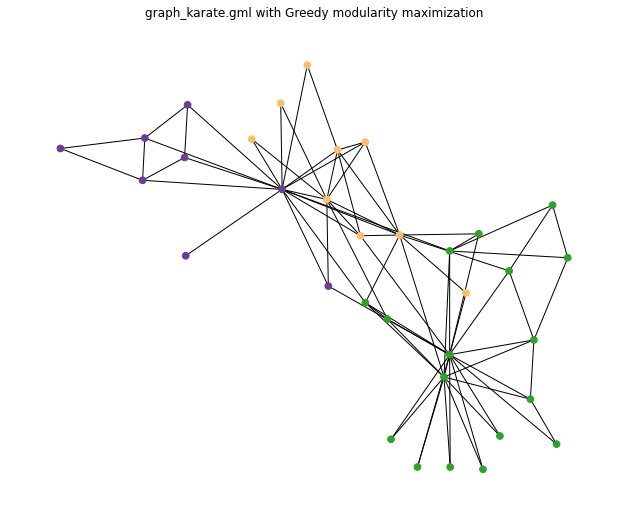

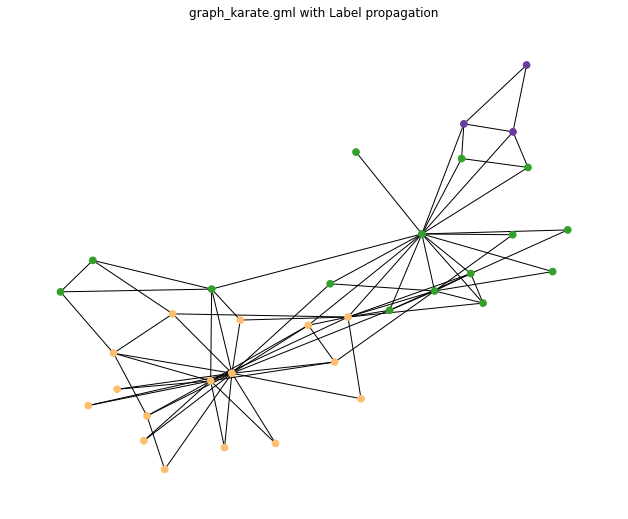

Communities with Greedy modularity maximization: 3, with randomized graph: 6
Communities with Label propagation: 3, with randomized graph: 1


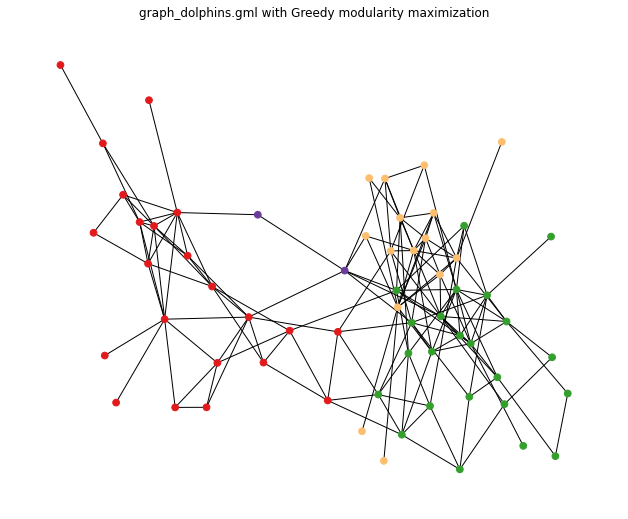

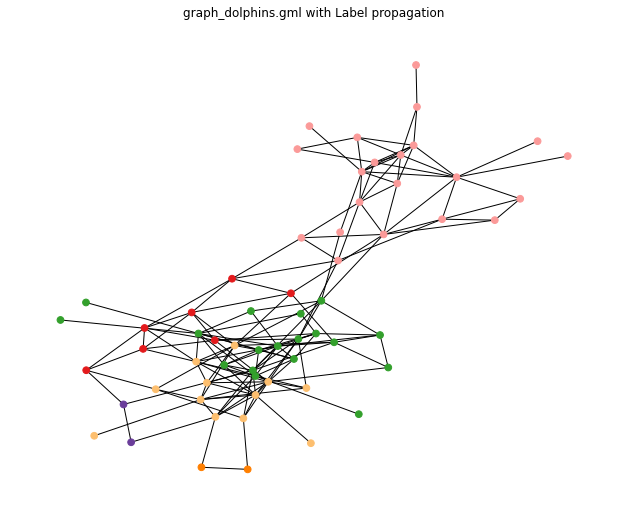

Communities with Greedy modularity maximization: 4, with randomized graph: 5
Communities with Label propagation: 6, with randomized graph: 2


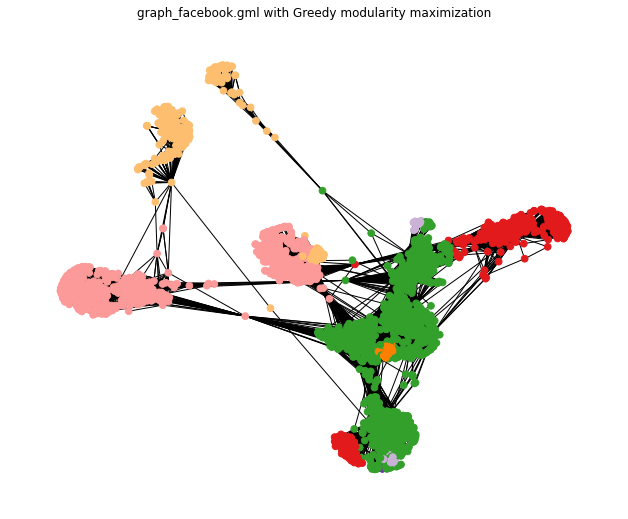

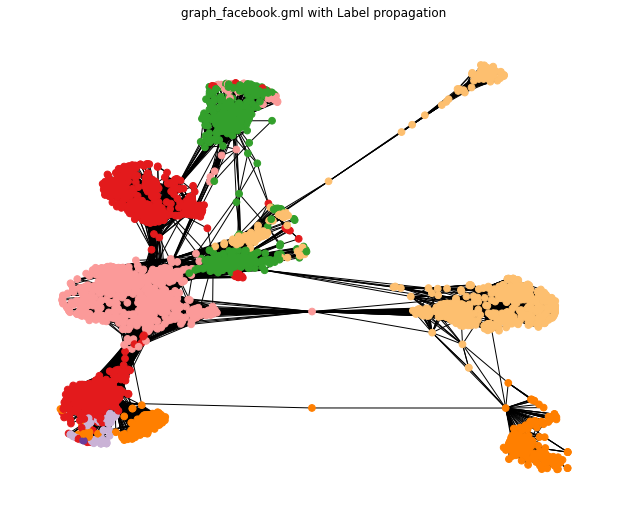

Communities with Greedy modularity maximization: 13, with randomized graph: 18
Communities with Label propagation: 44, with randomized graph: 2


In [5]:
filenames = ["graph_karate.gml", "graph_dolphins.gml", "graph_facebook.gml"]
for i in range(len(filenames)):
    filename = filenames[i]
    g = nx.read_gml("data/{}".format(filename))
    g_rnd = nx.algorithms.smallworld.random_reference(g ,niter = 1, connectivity=False)

    gmc=list(nxacom.greedy_modularity_communities(g))
    gmc_rnd = list(nxacom.greedy_modularity_communities(g_rnd))
    new_graph = assign_community_color(g, gmc)
    algorithm1 = "Greedy modularity maximization"
    plot_graph(new_graph, filename, algorithm1)

    lpc=list(nxacom.label_propagation_communities(g))
    lpc_rnd = list(nxacom.label_propagation_communities(g_rnd))
    new_graph=assign_community_color(g, lpc)
    algorithm2 = "Label propagation"
    plot_graph(new_graph, filename, algorithm2)
                    
    print("Communities with {}: {}, with randomized graph: {}".format(algorithm1, len(gmc), len(gmc_rnd)))
    print("Communities with {}: {}, with randomized graph: {}".format(algorithm2, len(lpc), len(lpc_rnd)))

<h1>A04.2 Erdos-Renyi random networks</h1>

<p>Task: Generate three Erdos-Renyi networks with 𝑁 = 500 nodes and average degree (a)⟨𝑘⟩ = 0.2, (b)⟨𝑘⟩ = 1 and (c) ⟨𝑘⟩ = 2. Visualize these networks. </p>

In [6]:
def draw_er_network(N, k):
    p = k/(N-1)

    g = nx.erdos_renyi_graph(N, p)
    pos = nx.spring_layout(g)
    colors = []
    for node in g:
        if node < N/2:
            colors.append('red')
        else:
            colors.append('yellow')

    plt.figure(3, figsize=(25, 25))
    plt.title("Erdos-Renyi network with k={}".format(k))
    nx.draw(g, node_color = colors, with_labels=False, node_size=500, pos = pos)

    plt.show()

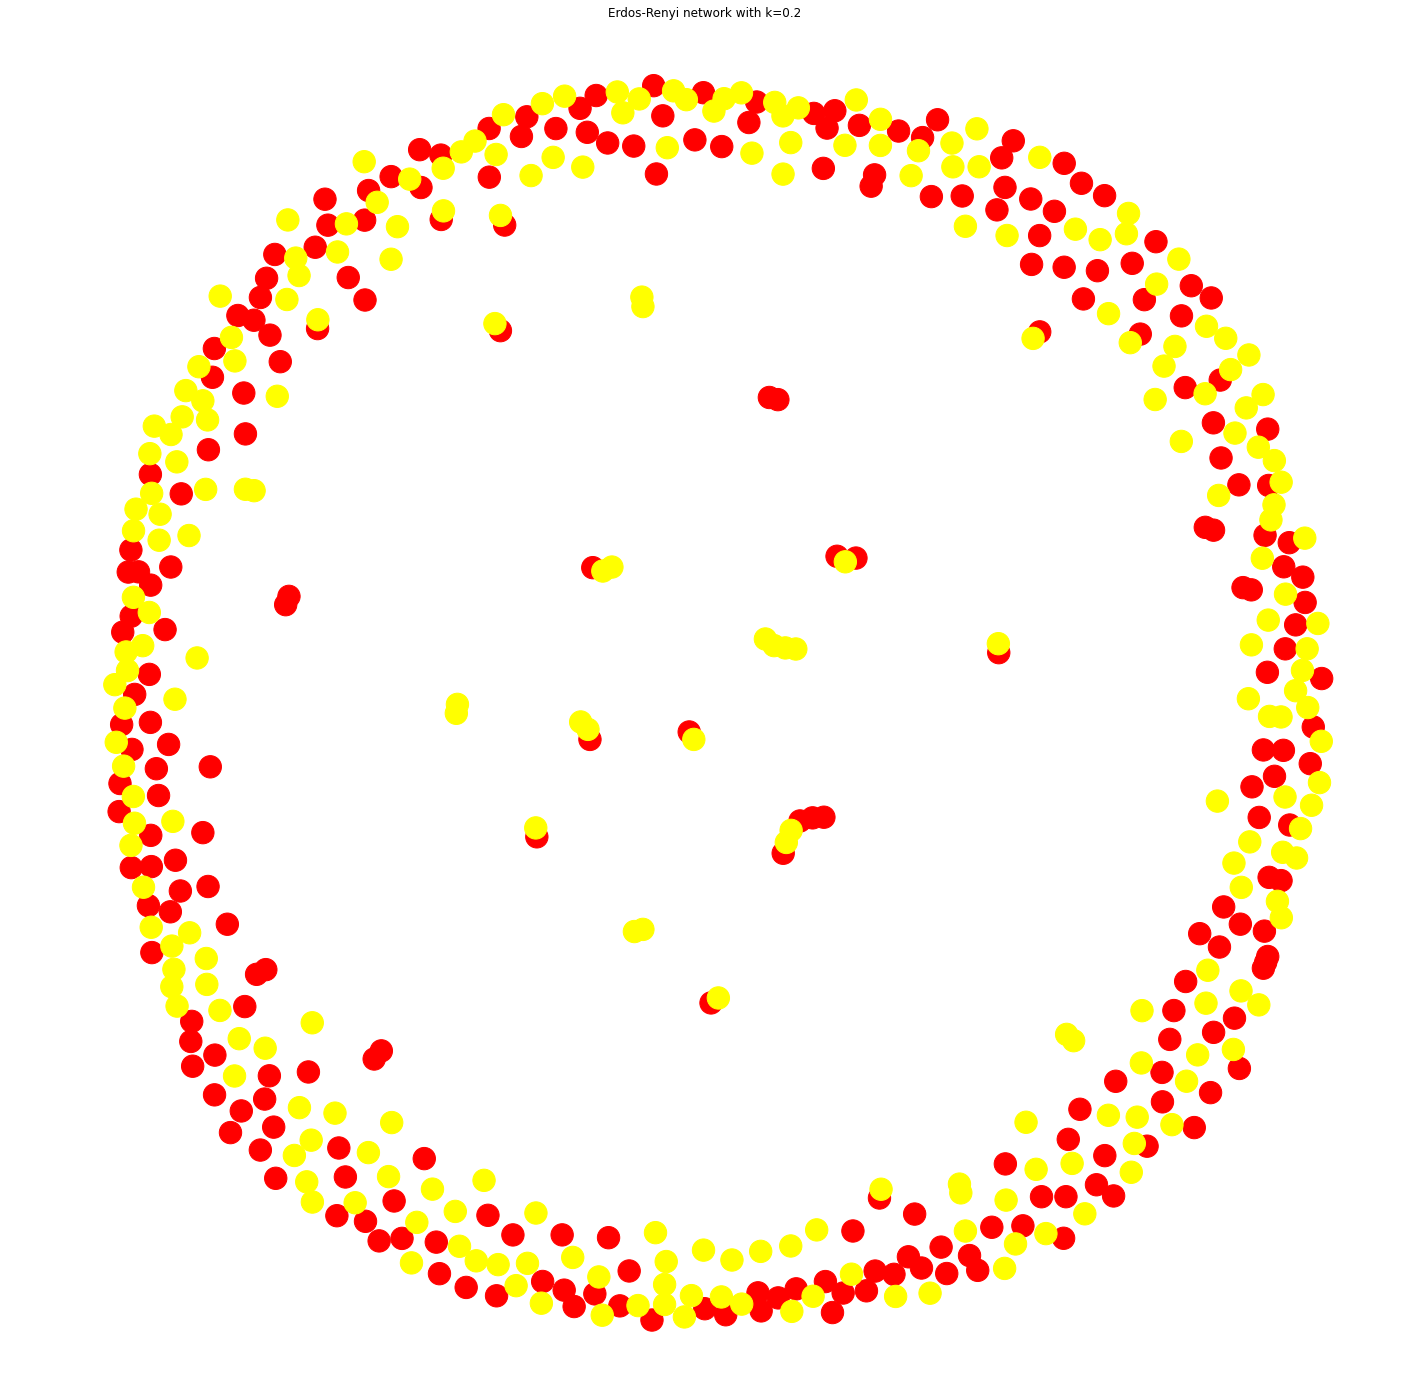

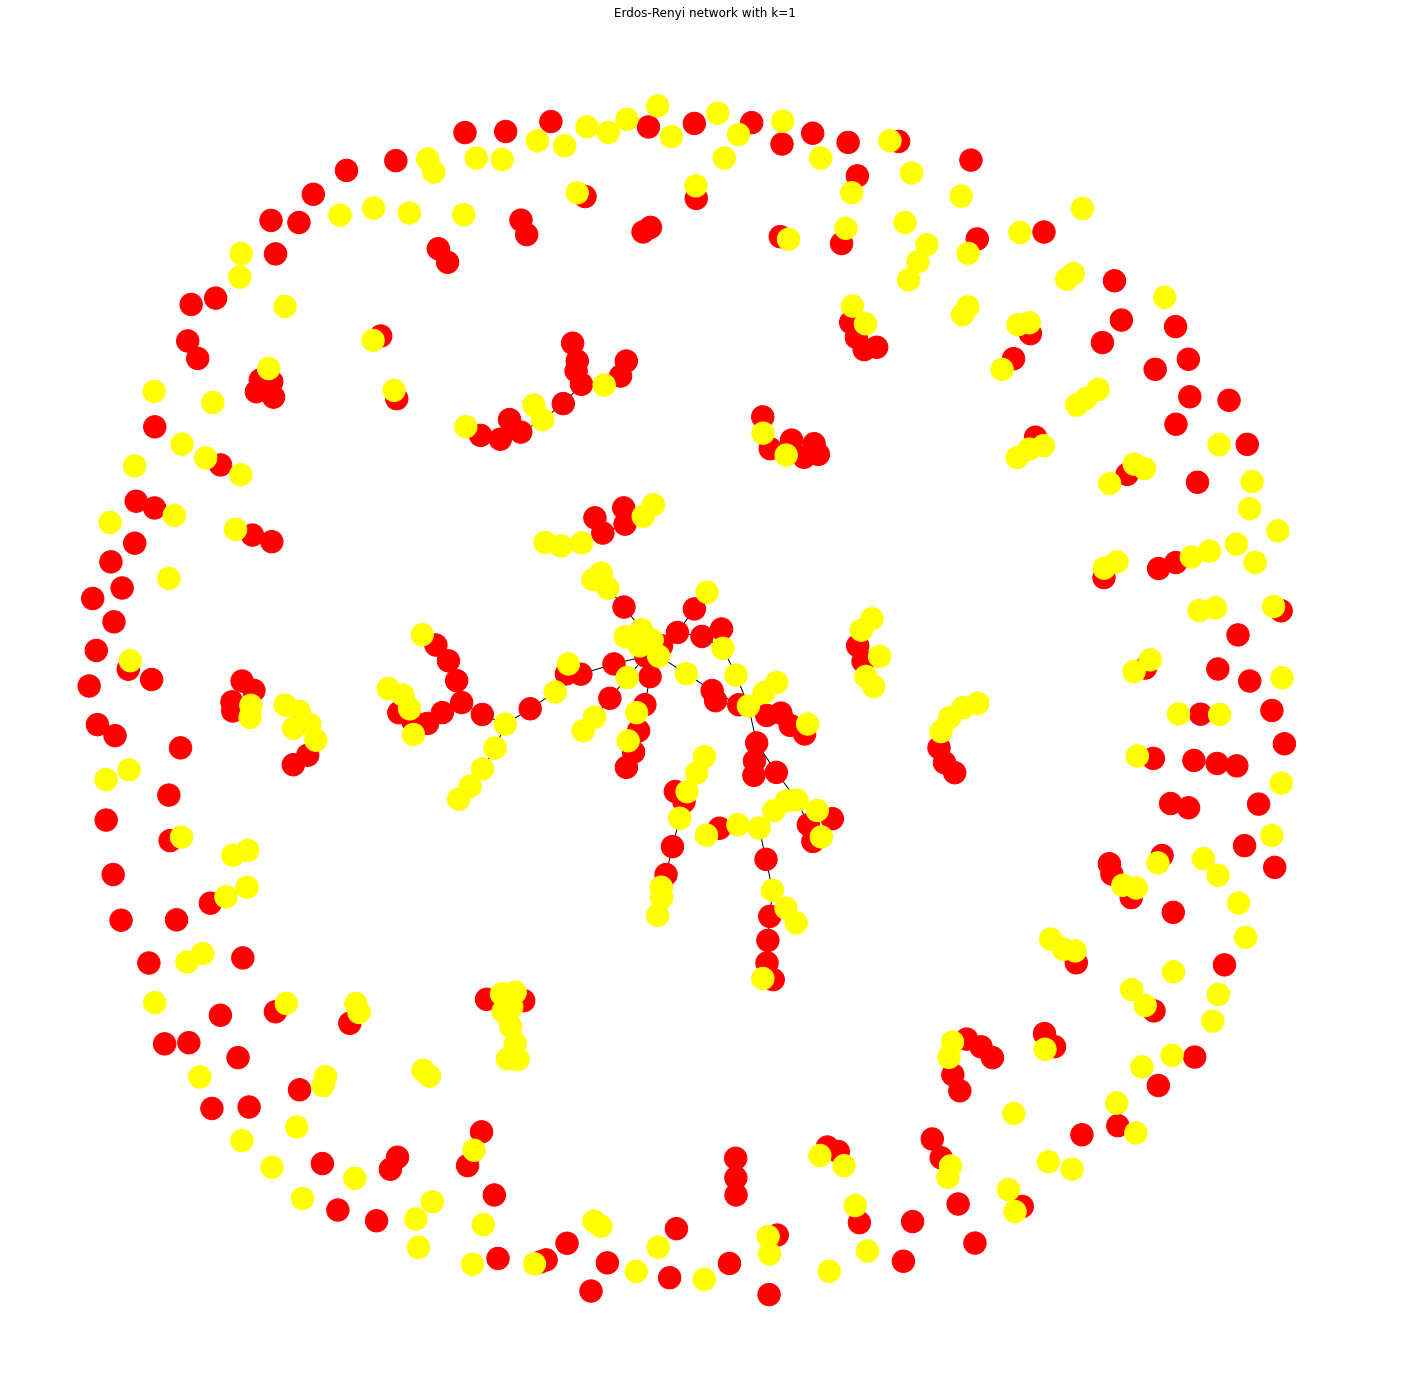

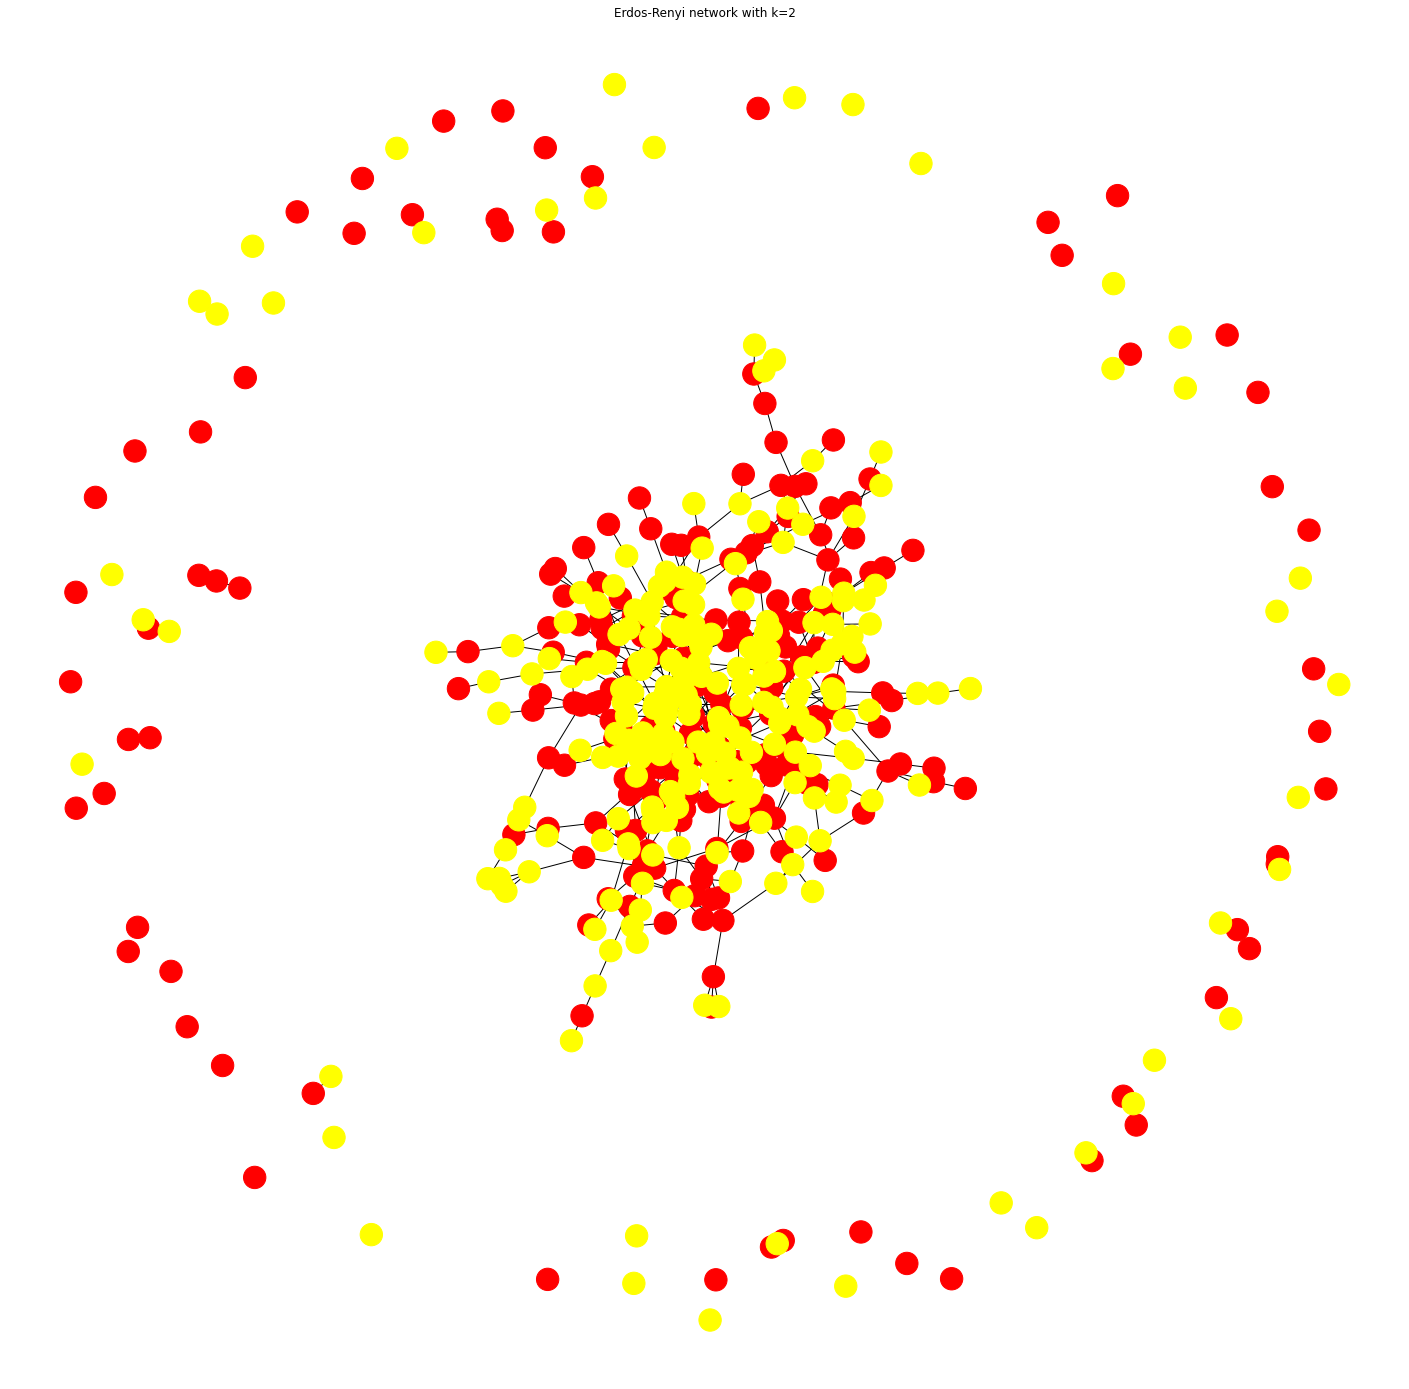

In [7]:
draw_er_network(500, 0.2)
draw_er_network(500, 1)
draw_er_network(500, 2)

<p>1. Plot the probability that a node belongs to the largest connected component 𝑁𝐺/𝑁 as a function of 𝑝 and mark with a vertical line the critical probability 𝑝𝑐 = 1/N</p>

In [8]:
def plot_node_probability(x, y, N):
    plt.figure(3, figsize=(10, 8))
    plt.axvline(x=1/N, linestyle='--')
    plt.plot(x, y, color='r')
    plt.title("Probability that a node belongs to the largest connected component Ng/N")
    plt.xscale('log'),
    plt.xlabel("P")
    plt.ylabel("P(node belongs to largest connected component Ng/N)")
    plt.show()

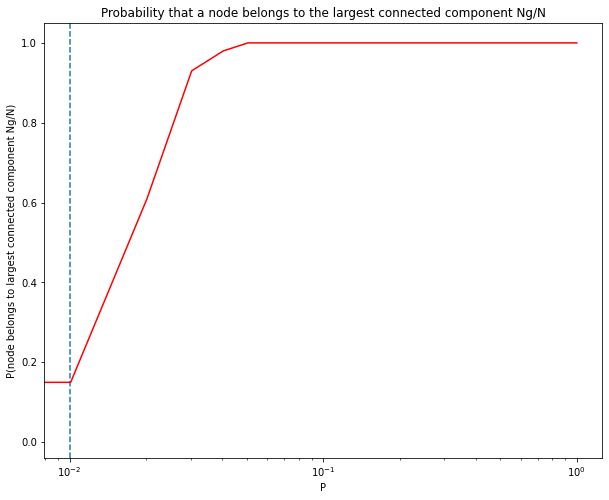

In [9]:
N=100
p = list(np.linspace(0, 1, N))
connected = []

for i in range(N) :
    g = nx.erdos_renyi_graph(N, p[i])
    components = [i for i in nx.connected_components(g)]
    maxcomp = max(components, key=len)
    connected.append(len(maxcomp)/N)
plot_node_probability(p, connected, N)

<p> 2. Plot the average clustering ⟨𝐶⟩ as a function of 𝑝 and give an interpretation of the result </p>

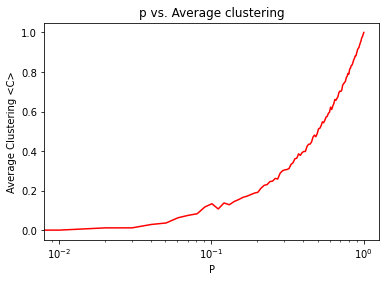

In [10]:
avg_c = []

for i in range(N):
    g = nx.erdos_renyi_graph(N, p[i])
    avg_c.append(nx.average_clustering(g))
    
plt.plot(p, avg_c, color='r')
plt.title("p vs. Average clustering")
plt.xscale('log')
plt.xlabel("P")
plt.ylabel("Average Clustering <C>")
plt.show()

Give an interpretation of the result:

<h1>A04.3 Small-world with high clustering</h1>